In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
recs = pd.read_csv('Data/recs2020_public_v7.csv')
recs

,DOEID,REGIONC,DIVISION,STATE_FIPS,state_postal,state_name,BA_climate,IECC_climate_code,UATYP10,HDD65,...,EVCHRGHOME,EVCHRGAPT,EVCHRGWKS,EVCHRGBUS,EVCHRGMUNI,EVCHRGDLR,EVCHRGHWY,EVCHRGOTH,EVHOMEAMT,EVCHRGTYPE
0,100001,WEST,Mountain South,35,NM,New Mexico,Mixed-Dry,4B,U,3844,...,-2.0,-2,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0
1,100002,SOUTH,West South Central,5,AR,Arkansas,Mixed-Humid,4A,U,3766,...,-2.0,-2,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0
2,100003,WEST,Mountain South,35,NM,New Mexico,Mixed-Dry,4B,U,3819,...,-2.0,-2,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0
3,100004,SOUTH,South Atlantic,45,SC,South Carolina,Mixed-Humid,3A,U,2614,...,-2.0,-2,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0
4,100005,NORTHEAST,Middle Atlantic,34,NJ,New Jersey,Mixed-Humid,4A,U,4219,...,-2.0,-2,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18491,118492,SOUTH,South Atlantic,24,MD,Maryland,Mixed-Humid,4A,U,4572,...,-2.0,-2,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0
18492,118493,NORTHEAST,New England,23,ME,Maine,Very-Cold,7A,R,9861,...,-2.0,-2,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0
18493,118494,SOUTH,West South Central,48,TX,Texas,Hot-Humid,2A,U,405,...,-2.0,-2,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0
18494,118495,SOUTH,South Atlantic,45,SC,South Carolina,Hot-Humid,3A,U,1245,...,-2.0,-2,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0


In [3]:
columnsToKeep_recs = ["DIVISION","TYPEHUQ","KOWNRENT",'YEARMADERANGE',"SQFTEST","KWH","BTUNG","TOTALBTUSPH","KWHCOL"]
recs_reduced = recs[columnsToKeep_recs]
recs_reduced

,DIVISION,TYPEHUQ,KOWNRENT,YEARMADERANGE,SQFTEST,KWH,BTUNG,TOTALBTUSPH,KWHCOL
0,Mountain South,2,1,4,2100,12521.48,101924.43,73942.18,3275.90
1,West South Central,5,2,5,590,5243.05,10145.32,6293.72,1359.81
2,Mountain South,5,2,3,900,2387.64,22603.08,16993.72,1583.68
3,South Atlantic,2,1,5,2100,9275.07,55118.66,42812.12,1472.33
4,Middle Atlantic,5,2,3,800,5869.70,39099.51,8818.47,1872.74
...,...,...,...,...,...,...,...,...,...
18491,South Atlantic,3,1,8,1200,5638.33,30692.52,22082.88,903.40
18492,New England,2,1,2,1530,4425.20,0.00,193613.54,748.21
18493,West South Central,1,1,9,1500,15121.25,0.00,0.00,3109.52
18494,South Atlantic,2,1,7,3000,18604.35,0.00,4997.49,5708.15


In [4]:
def clean_data(yr):
    if (yr < 3):
        return 0
    elif (yr < 5):
        return 1
    elif (yr < 7):
        return 2
    else:
        return 3

In [5]:
recs_reduced = recs_reduced.copy()
recs_reduced["SQM"] = recs_reduced["SQFTEST"] * 0.092903
recs_reduced["NormalizedGasKWh"] = recs_reduced["BTUNG"] * 0.293071 / recs_reduced["SQM"]
recs_reduced["NormalizedElecKWh"] = recs_reduced["KWH"] / recs_reduced["SQM"]
recs_reduced["NormalizedHeatKWh"] = recs_reduced["TOTALBTUSPH"] * 0.293071 / recs_reduced["SQM"]
recs_reduced["NormalizedCoolKWh"] = recs_reduced["KWHCOL"] / recs_reduced["SQM"]
recs_reduced["YRCONC"] = recs_reduced["YEARMADERANGE"].apply(clean_data)
recs_reduced = recs_reduced[recs_reduced['NormalizedGasKWh'] <= 600]
recs_reduced = recs_reduced[recs_reduced['NormalizedElecKWh'] <= 600]
recs_reduced = recs_reduced[recs_reduced['NormalizedHeatKWh'] <= 600]
recs_reduced = recs_reduced[recs_reduced['NormalizedCoolKWh'] <= 600]
recs_reduced

,DIVISION,TYPEHUQ,KOWNRENT,YEARMADERANGE,SQFTEST,KWH,BTUNG,TOTALBTUSPH,KWHCOL,SQM,NormalizedGasKWh,NormalizedElecKWh,NormalizedHeatKWh,NormalizedCoolKWh,YRCONC
0,Mountain South,2,1,4,2100,12521.48,101924.43,73942.18,3275.90,195.09630,153.109488,64.181022,111.074934,16.791195,1
1,West South Central,5,2,5,590,5243.05,10145.32,6293.72,1359.81,54.81277,54.244642,95.653805,33.651042,24.808270,2
2,Mountain South,5,2,3,900,2387.64,22603.08,16993.72,1583.68,83.61270,79.226090,28.555949,59.564713,18.940663,1
3,South Atlantic,2,1,5,2100,9275.07,55118.66,42812.12,1472.33,195.09630,82.798499,47.540984,64.311783,7.546683,2
4,Middle Atlantic,5,2,3,800,5869.70,39099.51,8818.47,1872.74,74.32240,154.178720,78.976190,34.773336,25.197518,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18491,South Atlantic,3,1,8,1200,5638.33,30692.52,22082.88,903.40,111.48360,80.685298,50.575421,58.052052,8.103434,3
18492,New England,2,1,2,1530,4425.20,0.00,193613.54,748.21,142.14159,0.000000,31.132338,399.197123,5.263836,0
18493,West South Central,1,1,9,1500,15121.25,0.00,0.00,3109.52,139.35450,0.000000,108.509234,0.000000,22.313739,3
18494,South Atlantic,2,1,7,3000,18604.35,0.00,4997.49,5708.15,278.70900,0.000000,66.751881,5.255013,20.480681,3


In [6]:
region_mapping = {
    "New England": 1,
    "Middle Atlantic": 2,
    "East North Central": 3,
    "West North Central": 4,
    "South Atlantic": 5,
    "East South Central": 6,
    "West South Central": 7,
    "Mountain North": 8,  # Assuming Mountain North and Mountain South are combined into Mountain
    "Mountain South": 8,  # Assuming Mountain North and Mountain South are combined into Mountain
    "Pacific": 9
}
recs_reduced['DIVISION'] = recs_reduced['DIVISION'].map(region_mapping)
recs_reduced

,DIVISION,TYPEHUQ,KOWNRENT,YEARMADERANGE,SQFTEST,KWH,BTUNG,TOTALBTUSPH,KWHCOL,SQM,NormalizedGasKWh,NormalizedElecKWh,NormalizedHeatKWh,NormalizedCoolKWh,YRCONC
0,8,2,1,4,2100,12521.48,101924.43,73942.18,3275.90,195.09630,153.109488,64.181022,111.074934,16.791195,1
1,7,5,2,5,590,5243.05,10145.32,6293.72,1359.81,54.81277,54.244642,95.653805,33.651042,24.808270,2
2,8,5,2,3,900,2387.64,22603.08,16993.72,1583.68,83.61270,79.226090,28.555949,59.564713,18.940663,1
3,5,2,1,5,2100,9275.07,55118.66,42812.12,1472.33,195.09630,82.798499,47.540984,64.311783,7.546683,2
4,2,5,2,3,800,5869.70,39099.51,8818.47,1872.74,74.32240,154.178720,78.976190,34.773336,25.197518,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18491,5,3,1,8,1200,5638.33,30692.52,22082.88,903.40,111.48360,80.685298,50.575421,58.052052,8.103434,3
18492,1,2,1,2,1530,4425.20,0.00,193613.54,748.21,142.14159,0.000000,31.132338,399.197123,5.263836,0
18493,7,1,1,9,1500,15121.25,0.00,0.00,3109.52,139.35450,0.000000,108.509234,0.000000,22.313739,3
18494,5,2,1,7,3000,18604.35,0.00,4997.49,5708.15,278.70900,0.000000,66.751881,5.255013,20.480681,3


In [8]:
print(recs_reduced.columns)

Index(['DIVISION', 'TYPEHUQ', 'KOWNRENT', 'YEARMADERANGE', 'SQFTEST', 'KWH',
       'BTUNG', 'TOTALBTUSPH', 'KWHCOL', 'SQM', 'NormalizedGasKWh',
       'NormalizedElecKWh', 'NormalizedHeatKWh', 'NormalizedCoolKWh',
       'YRCONC'],
      dtype='object')


In [9]:
recs_reduced = recs_reduced.drop(columns=['TYPEHUQ','KOWNRENT','SQFTEST','KWH','BTUNG','TOTALBTUSPH','KWHCOL','YEARMADERANGE'])
recs_reduced

,DIVISION,SQM,NormalizedGasKWh,NormalizedElecKWh,NormalizedHeatKWh,NormalizedCoolKWh,YRCONC
0,8,195.09630,153.109488,64.181022,111.074934,16.791195,1
1,7,54.81277,54.244642,95.653805,33.651042,24.808270,2
2,8,83.61270,79.226090,28.555949,59.564713,18.940663,1
3,5,195.09630,82.798499,47.540984,64.311783,7.546683,2
4,2,74.32240,154.178720,78.976190,34.773336,25.197518,1
...,...,...,...,...,...,...,...
18491,5,111.48360,80.685298,50.575421,58.052052,8.103434,3
18492,1,142.14159,0.000000,31.132338,399.197123,5.263836,0
18493,7,139.35450,0.000000,108.509234,0.000000,22.313739,3
18494,5,278.70900,0.000000,66.751881,5.255013,20.480681,3


In [11]:
cbecs = pd.read_csv('Data/cbecs2018_final_public.csv')
cbecs

,PUBID,REGION,CENDIV,PBA,PUBCLIM,SQFT,SQFTC,WLCNS,RFCNS,RFCOOL,...,ZMFBTU,ZMFEXP,ZELCNS,ZELEXP,ZNGCNS,ZNGEXP,ZFKCNS,ZFKEXP,ZDHBTU,ZDHEXP
0,1,3,5,2,3,210000,8,1,4,2,...,0,0,0,0,9,9,1,1,0,0
1,2,4,9,2,4,28000,5,1,6,1,...,0,0,0,0,0,0,9,9,9,9
2,3,3,5,8,4,2100,2,1,4,2,...,0,0,0,0,9,9,9,9,9,9
3,4,3,7,5,5,240000,8,2,6,1,...,0,0,0,0,1,1,9,9,9,9
4,5,1,2,5,3,295000,8,3,6,2,...,0,0,0,0,0,0,9,9,9,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6431,6432,4,8,14,2,130000,7,1,1,2,...,0,0,0,0,0,0,9,9,9,9
6432,6433,3,7,1,4,1050,2,1,5,2,...,9,9,9,9,9,9,9,9,9,9
6433,6434,3,5,2,4,122000,7,2,6,1,...,1,1,1,1,9,9,9,9,9,9
6434,6435,3,5,23,4,15000,4,3,5,1,...,2,2,2,2,2,2,9,9,9,9


In [12]:
columnsToKeep = ["PBA","CENDIV","SQFT",'OWNOCC',"YRCONC","ELCNS","NGBTU","MFHTBTU","MFCLBTU"]
cbecs_reduced = cbecs[columnsToKeep]
cbecs_reduced

,PBA,CENDIV,SQFT,OWNOCC,YRCONC,ELCNS,NGBTU,MFHTBTU,MFCLBTU
0,2,5,210000,2.0,2,5483285.0,NaN,10592748.0,1823745.0
1,2,9,28000,2.0,6,448027.0,201988.0,199383.0,43482.0
2,8,5,2100,2.0,6,15354.0,NaN,11021.0,2161.0
3,5,7,240000,2.0,9,578621.0,1211520.0,1135594.0,270861.0
4,5,2,295000,2.0,4,378243.0,3386445.0,3386445.0,0.0
...,...,...,...,...,...,...,...,...,...
6431,14,8,130000,1.0,4,689577.0,4160590.0,3335629.0,181607.0
6432,1,7,1050,NaN,7,NaN,NaN,NaN,NaN
6433,2,5,122000,1.0,6,3445040.0,NaN,931126.0,1142322.0
6434,23,5,15000,2.0,5,281519.0,235448.0,133528.0,214333.0


In [13]:
def clean_data(yr):
    if (yr < 4):
        return 0
    elif (yr < 6):
        return 1
    elif (yr < 8):
        return 2
    else:
        return 3

In [14]:
cbecs_reduced = cbecs_reduced.copy()
cbecs_reduced["SQM"] = cbecs_reduced["SQFT"] * 0.092903
cbecs_reduced["NormalizedGasKWh"] = cbecs_reduced["NGBTU"] * 0.293071 / cbecs_reduced["SQM"]
cbecs_reduced["NormalizedElecKWh"] = cbecs_reduced["ELCNS"] / cbecs_reduced["SQM"]
cbecs_reduced["NormalizedHeatKWh"] = cbecs_reduced["MFHTBTU"] * 0.293071 / cbecs_reduced["SQM"]
cbecs_reduced["NormalizedCoolKWh"] =  cbecs_reduced["MFCLBTU"] * 0.293071 / cbecs_reduced["SQM"]
cbecs_reduced["YRCONC"] = cbecs_reduced["YRCONC"].apply(clean_data)
cbecs_reduced = cbecs_reduced.rename(columns={'CENDIV': 'DIVISION'})
cbecs_reduced = cbecs_reduced[cbecs_reduced['SQM'] <= 50000]
cbecs_reduced = cbecs_reduced[cbecs_reduced['NormalizedGasKWh'] <= 600]
cbecs_reduced = cbecs_reduced[cbecs_reduced['NormalizedElecKWh'] <= 600]
cbecs_reduced = cbecs_reduced[cbecs_reduced['NormalizedHeatKWh'] <= 600]
cbecs_reduced = cbecs_reduced[cbecs_reduced['NormalizedCoolKWh'] <= 600]
cbecs_reduced

,PBA,DIVISION,SQFT,OWNOCC,YRCONC,ELCNS,NGBTU,MFHTBTU,MFCLBTU,SQM,NormalizedGasKWh,NormalizedElecKWh,NormalizedHeatKWh,NormalizedCoolKWh
1,2,9,28000,2.0,2,448027.0,201988.0,199383.0,43482.0,2601.2840,22.756771,172.233020,22.463282,4.898855
3,5,7,240000,2.0,3,578621.0,1211520.0,1135594.0,270861.0,22296.7200,15.924377,25.950947,14.926396,3.560232
4,5,2,295000,2.0,1,378243.0,3386445.0,3386445.0,0.0,27406.3850,36.213051,13.801273,36.213051,0.000000
5,14,5,94000,1.0,2,791765.0,1234016.0,688712.0,486055.0,8732.8820,41.412938,90.664800,23.112818,16.311754
7,5,3,122000,1.0,1,877997.0,894589.0,829299.0,299026.0,11334.1660,23.131662,77.464632,21.443438,7.732007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6427,2,2,265000,1.0,1,2661136.0,11672912.0,11734919.0,444150.0,24619.2950,138.955725,108.091479,139.693864,5.287214
6428,26,2,10500,2.0,3,70863.0,310017.0,310017.0,12621.0,975.4815,93.140662,72.644125,93.140662,3.791819
6430,18,1,132000,1.0,3,1103999.0,2175180.0,1416336.0,202903.0,12263.1960,51.983364,90.025390,33.848192,4.849061
6431,14,8,130000,1.0,1,689577.0,4160590.0,3335629.0,181607.0,12077.3900,100.961240,57.096525,80.942664,4.406891


In [15]:
print(cbecs_reduced.columns)

Index(['PBA', 'DIVISION', 'SQFT', 'OWNOCC', 'YRCONC', 'ELCNS', 'NGBTU',
       'MFHTBTU', 'MFCLBTU', 'SQM', 'NormalizedGasKWh', 'NormalizedElecKWh',
       'NormalizedHeatKWh', 'NormalizedCoolKWh'],
      dtype='object')


In [16]:
cbecs_reduced = cbecs_reduced.drop(columns=['SQFT','ELCNS','NGBTU','MFHTBTU','MFCLBTU','PBA','OWNOCC'])
cbecs_reduced

,DIVISION,YRCONC,SQM,NormalizedGasKWh,NormalizedElecKWh,NormalizedHeatKWh,NormalizedCoolKWh
1,9,2,2601.2840,22.756771,172.233020,22.463282,4.898855
3,7,3,22296.7200,15.924377,25.950947,14.926396,3.560232
4,2,1,27406.3850,36.213051,13.801273,36.213051,0.000000
5,5,2,8732.8820,41.412938,90.664800,23.112818,16.311754
7,3,1,11334.1660,23.131662,77.464632,21.443438,7.732007
...,...,...,...,...,...,...,...
6427,2,1,24619.2950,138.955725,108.091479,139.693864,5.287214
6428,2,3,975.4815,93.140662,72.644125,93.140662,3.791819
6430,1,3,12263.1960,51.983364,90.025390,33.848192,4.849061
6431,8,1,12077.3900,100.961240,57.096525,80.942664,4.406891


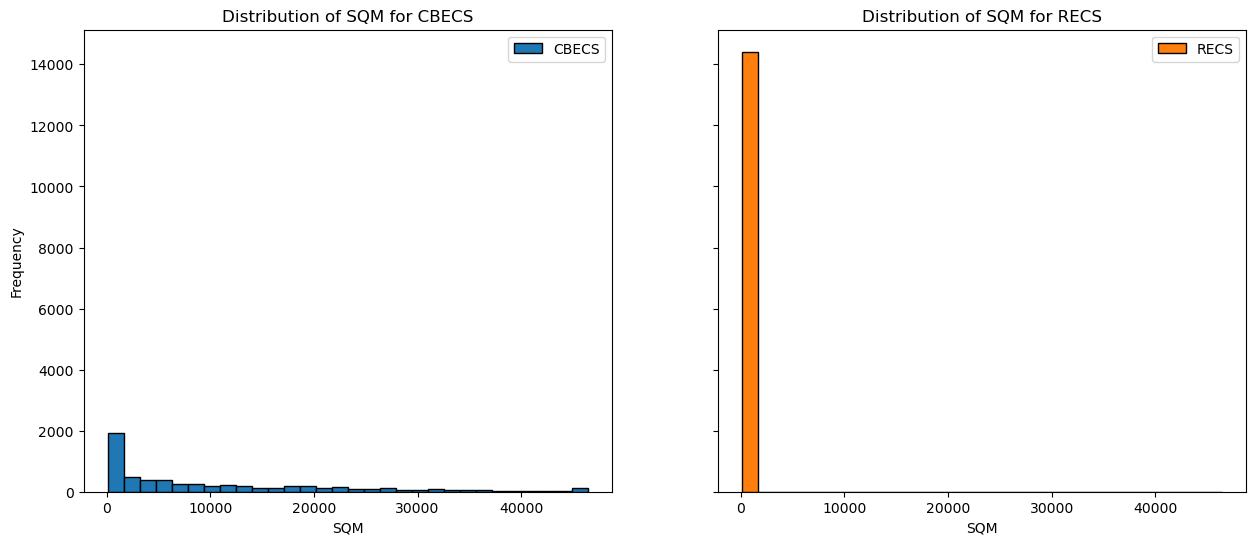

In [23]:
bins = 30

# Plot the histogram for cbecs_reduced
cbecs_hist, bins = np.histogram(cbecs_reduced['SQM'], bins=bins)
recs_hist, _ = np.histogram(recs_reduced['SQM'], bins=bins)

# Create a figure with two subplots
fig, ax = plt.subplots(1, 2, figsize=(15, 6), sharey=True)

# Plot the bar chart for CBECS
ax[0].bar(bins[:-1], cbecs_hist, width=np.diff(bins), edgecolor='black', align='edge', label='CBECS', color='#1f77b4')
ax[0].set_title('Distribution of SQM for CBECS')
ax[0].set_xlabel('SQM')
ax[0].set_ylabel('Frequency')
ax[0].legend()

# Plot the bar chart for RECS
ax[1].bar(bins[:-1], recs_hist, width=np.diff(bins), edgecolor='black', align='edge', label='RECS', color='#ff7f0e')
ax[1].set_title('Distribution of SQM for RECS')
ax[1].set_xlabel('SQM')
ax[1].legend()

plt.show()

In [15]:
recsCodeBook = pd.read_excel('Data/RECS 2020 Codebook for Public File - v7.xlsx', skiprows=1)
matching_rows = recsCodeBook[recsCodeBook['Variable'].isin(columnsToKeep_recs)]
matching_rows

,Variable,Type,Description and Labels,Response Codes,Section
2,DIVISION,Char,"Census Division, Mountain Division is divided ...",East North Central\nEast South Central\nMiddle...,GEOGRAPHY
13,TYPEHUQ,Num,Type of housing unit,1 Mobile home\n2 Single-family house detached ...,YOUR HOME
24,KOWNRENT,Num,Own or rent,1 Own\n2 Rent\n3 Occupy without payment of rent,YOUR HOME
25,YEARMADERANGE,Num,Range when housing unit was built,1 Before 1950\n2 1950 to 1959\n3 1960 to 1969\...,YOUR HOME
291,SQFTEST,Num,Respondent-reported square footage (rounded to...,240-15000,YOUR HOME
611,KWH,Num,"Total electricity use, in kilowatthours, 2020,...",42.01-184101.84,End-use Model
618,KWHCOL,Num,Calibrated electricity usage for space cooling...,0-31758.14,End-use Model
702,BTUNG,Num,"Total natural gas use, in thousand Btu, 2020",0-1134708.69,End-use Model
775,TOTALBTUSPH,Num,Total usage for space heating including electr...,0-396395,End-use Model


In [18]:
cbecsCodeBook = pd.read_excel('Data/2018microdata_codebook.xlsx', skiprows=1)
cbecsCodeBook = cbecsCodeBook.rename(columns={'Variable\norder': 'Variable order','Variable\nname': 'Variable name'})
matching_rows_cbecs = cbecsCodeBook[cbecsCodeBook['Variable name'].isin(columnsToKeep)]
matching_rows_cbecs

,Variable order,Variable name,Variable type,Label,Values/Format codes,Question text
2,3,CENDIV,Num,Census division,1=New England\n2=Middle Atlantic \n3=East Nor...,NaN
3,4,PBA,Num,Principal building activity,1=Vacant\n2=Office\n4=Laboratory\n5=Nonrefrige...,NaN
5,6,SQFT,Num,Square footage,"1,001 – 2,100,000",What is the gross or total square footage of a...
21,22,YRCONC,Num,Year of construction category,2=Before 1946\n3=1946 to 1959\n4=1960 to 1969\...,Which range best describes when this building ...
64,65,OWNOCC,Num,Derived variable: Owner occupied or leased to ...,1=Owner occupied\n2=Leased to tenant(s)\nMissi...,NaN
567,568,ELCNS,Num,Building/energy supplier variable: Annual elec...,"36 – 113,727,053\nMissing=Not applicable",NaN
569,570,NGBTU,Num,Building/energy supplier variable: Annual natu...,"103 – 456,926,121\nMissing=Not applicable",NaN
585,586,MFHTBTU,Num,Modeled variable: Major fuels heating use (tho...,"0 – 417,233,255\nMissing=Not applicable",NaN
586,587,MFCLBTU,Num,Modeled variable: Major fuels cooling use (tho...,"0 – 121,963,882\nMissing=Not applicable",NaN


In [17]:

recs_reduced.to_csv('data/cleaned_recs.csv', index=True)
cbecs_reduced.to_csv('data/cleaned_cbecs.csv', index=True)

#matching_rows.to_csv('data/cleaned_recs_codebook.csv', index=True)
#matching_rows_cbecs.to_csv('data/cleaned_cbecs_codebook.csv', index=True)

In [90]:
recsCodeBook = pd.read_csv('Data/recs_codebook.csv')
imputation_flag_rows = recsCodeBook[recsCodeBook['Description and Labels'].str.contains('Imputation', na=False)]
weight_rows = recsCodeBook[recsCodeBook['Description and Labels'].str.contains('Final Analysis Weight', na=False)]
columns_to_drop = imputation_flag_rows['Variable'].tolist() + (weight_rows['Variable'].tolist())
recs_reduced = recs.drop(columns=columns_to_drop)
recs_reduced.drop(columns=["DOEID","STATE_FIPS","state_postal","state_name"],inplace=True)
recs_reduced

,REGIONC,DIVISION,BA_climate,IECC_climate_code,UATYP10,HDD65,CDD65,HDD30YR_PUB,CDD30YR_PUB,TYPEHUQ,...,EVCHRGHOME,EVCHRGAPT,EVCHRGWKS,EVCHRGBUS,EVCHRGMUNI,EVCHRGDLR,EVCHRGHWY,EVCHRGOTH,EVHOMEAMT,EVCHRGTYPE
0,WEST,Mountain South,Mixed-Dry,4B,U,3844,1679,4451,1027,2,...,-2.0,-2,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0
1,SOUTH,West South Central,Mixed-Humid,4A,U,3766,1458,4429,1305,5,...,-2.0,-2,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0
2,WEST,Mountain South,Mixed-Dry,4B,U,3819,1696,4500,1010,5,...,-2.0,-2,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0
3,SOUTH,South Atlantic,Mixed-Humid,3A,U,2614,1718,3229,1653,2,...,-2.0,-2,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0
4,NORTHEAST,Middle Atlantic,Mixed-Humid,4A,U,4219,1363,4896,1059,5,...,-2.0,-2,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18491,SOUTH,South Atlantic,Mixed-Humid,4A,U,4572,1037,4547,1190,3,...,-2.0,-2,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0
18492,NORTHEAST,New England,Very-Cold,7A,R,9861,283,9862,186,2,...,-2.0,-2,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0
18493,SOUTH,West South Central,Hot-Humid,2A,U,405,4725,672,4047,1,...,-2.0,-2,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0
18494,SOUTH,South Atlantic,Hot-Humid,3A,U,1245,3038,1752,2295,2,...,-2.0,-2,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0


In [91]:
variables_subset = recsCodeBook.loc[611:782, 'Variable']
variables_subset

611            KWH
612          BTUEL
613       DOLLAREL
614         ELXBTU
615       PERIODEL
          ...     
778    TOTALDOLWTH
779    TOTALBTUOTH
780    TOTALDOLOTH
781       TOTALBTU
782       TOTALDOL
Name: Variable, Length: 172, dtype: object

In [92]:

region_mapping = {
    "MIDWEST": 0,
    "NORTHEAST": 1,
    "SOUTH": 2,
    "WEST": 3
}

div_mapping = {
    "East North Central": 0,
    "East South Central": 1,
    "Middle Atlantic": 2,
    "Mountain North": 3,
    "Mountain South": 4,
    "New England": 5,
    "Pacific": 6,
    "South Atlantic": 7,
    "West North Central": 8,
    "West South Central": 9
}

climate_mapping = {
    "Cold": 0,
    "Hot-Dry": 1,
    "Hot-Humid": 2,
    "Marine": 3,
    "Mixed-Dry": 4,
    "Mixed-Humid": 5,
    "Subarctic": 6,
    "Very-Cold": 7
}

IECCClimate_mapping = {
    "1A": 0,
    "2A": 1,
    "2B": 2,
    "3A": 3,
    "3B": 4,
    "3C": 5,
    "4A": 6,
    "4B": 7,
    "4C": 8,
    "5A": 9,
    "5B": 10,
    "5C": 11,
    "6A": 12,
    "6B": 13,
    "7A": 14,
    "7AK": 15,
    "7B": 16,
    "8AK": 17
}

UATYP10_mapping = {
    "C": 0,
    "R": 1,
    "U": 2
}

# Map the values in the 'Region' column
recs_reduced['REGIONC'] = recs_reduced['REGIONC'].map(region_mapping)
recs_reduced['DIVISION'] = recs_reduced['DIVISION'].map(div_mapping)
recs_reduced['BA_climate'] = recs_reduced['BA_climate'].map(climate_mapping)
recs_reduced['IECC_climate_code'] = recs_reduced['IECC_climate_code'].map(IECCClimate_mapping)
recs_reduced['UATYP10'] = recs_reduced['UATYP10'].map(UATYP10_mapping)

# Display the updated DataFrame
recs_reduced

,REGIONC,DIVISION,BA_climate,IECC_climate_code,UATYP10,HDD65,CDD65,HDD30YR_PUB,CDD30YR_PUB,TYPEHUQ,...,EVCHRGHOME,EVCHRGAPT,EVCHRGWKS,EVCHRGBUS,EVCHRGMUNI,EVCHRGDLR,EVCHRGHWY,EVCHRGOTH,EVHOMEAMT,EVCHRGTYPE
0,3,4,4,7,2,3844,1679,4451,1027,2,...,-2.0,-2,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0
1,2,9,5,6,2,3766,1458,4429,1305,5,...,-2.0,-2,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0
2,3,4,4,7,2,3819,1696,4500,1010,5,...,-2.0,-2,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0
3,2,7,5,3,2,2614,1718,3229,1653,2,...,-2.0,-2,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0
4,1,2,5,6,2,4219,1363,4896,1059,5,...,-2.0,-2,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18491,2,7,5,6,2,4572,1037,4547,1190,3,...,-2.0,-2,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0
18492,1,5,7,14,1,9861,283,9862,186,2,...,-2.0,-2,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0
18493,2,9,2,1,2,405,4725,672,4047,1,...,-2.0,-2,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0
18494,2,7,2,3,2,1245,3038,1752,2295,2,...,-2.0,-2,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0


In [93]:
# Calculate the correlation matrix
corr_matrix = recs_reduced.corr()

In [87]:
corr_matrix

,REGIONC,DIVISION,BA_climate,IECC_climate_code,UATYP10,HDD65,CDD65,HDD30YR_PUB,CDD30YR_PUB,TYPEHUQ,...,EVCHRGHOME,EVCHRGAPT,EVCHRGWKS,EVCHRGBUS,EVCHRGMUNI,EVCHRGDLR,EVCHRGHWY,EVCHRGOTH,EVHOMEAMT,EVCHRGTYPE
REGIONC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DIVISION,NaN,1.000000,0.221940,-0.315011,-0.001294,-0.277283,0.278216,-0.291812,0.306577,-0.010192,...,0.003273,0.003115,0.003554,0.003598,0.002579,0.003356,0.003108,0.001924,0.000432,0.003076
BA_climate,NaN,0.221940,1.000000,-0.282764,0.004669,-0.154923,0.047928,-0.159634,0.124057,0.034508,...,-0.012949,-0.011668,-0.009559,-0.007619,-0.010903,-0.008644,-0.011305,-0.011825,-0.012439,-0.012515
IECC_climate_code,NaN,-0.315011,-0.282764,1.000000,-0.181708,0.949664,-0.800716,0.943443,-0.819193,-0.011124,...,-0.016590,-0.016747,-0.018799,-0.016646,-0.014589,-0.017442,-0.016661,-0.016328,-0.016433,-0.014883
UATYP10,NaN,-0.001294,0.004669,-0.181708,1.000000,-0.211013,0.166554,-0.207369,0.149299,0.203092,...,0.029758,0.033199,0.032539,0.033131,0.032840,0.032412,0.033398,0.032406,0.024230,0.025285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
EVCHRGDLR,NaN,0.003356,-0.008644,-0.017442,0.032412,-0.029327,0.005525,-0.030240,-0.001229,-0.018617,...,0.977702,0.990825,0.980120,0.979442,0.985164,1.000000,0.987396,0.979298,0.835995,0.861722
EVCHRGHWY,NaN,0.003108,-0.011305,-0.016661,0.033398,-0.028183,0.007704,-0.029206,0.000685,-0.022018,...,0.981132,0.988084,0.980217,0.981875,0.985551,0.987396,1.000000,0.980011,0.861949,0.880126
EVCHRGOTH,NaN,0.001924,-0.011825,-0.016328,0.032406,-0.029576,0.004783,-0.030423,-0.002817,-0.018706,...,0.969042,0.978729,0.973561,0.977227,0.978541,0.979298,0.980011,1.000000,0.857356,0.868955
EVHOMEAMT,NaN,0.000432,-0.012439,-0.016433,0.024230,-0.026854,0.003025,-0.028427,-0.002873,-0.035840,...,0.917898,0.859179,0.860662,0.847230,0.848867,0.835995,0.861949,0.857356,1.000000,0.942813


In [84]:
corr_matrix_cleaned = corr_matrix.dropna(axis=0, how='all').dropna(axis=1, how='all')
corr_matrix_cleaned

,DIVISION,BA_climate,IECC_climate_code,UATYP10,HDD65,CDD65,HDD30YR_PUB,CDD30YR_PUB,TYPEHUQ,CELLAR,...,EVCHRGHOME,EVCHRGAPT,EVCHRGWKS,EVCHRGBUS,EVCHRGMUNI,EVCHRGDLR,EVCHRGHWY,EVCHRGOTH,EVHOMEAMT,EVCHRGTYPE
DIVISION,1.000000,0.221940,-0.315011,-0.001294,-0.277283,0.278216,-0.291812,0.306577,-0.010192,-0.086472,...,0.003273,0.003115,0.003554,0.003598,0.002579,0.003356,0.003108,0.001924,0.000432,0.003076
BA_climate,0.221940,1.000000,-0.282764,0.004669,-0.154923,0.047928,-0.159634,0.124057,0.034508,-0.110995,...,-0.012949,-0.011668,-0.009559,-0.007619,-0.010903,-0.008644,-0.011305,-0.011825,-0.012439,-0.012515
IECC_climate_code,-0.315011,-0.282764,1.000000,-0.181708,0.949664,-0.800716,0.943443,-0.819193,-0.011124,0.201518,...,-0.016590,-0.016747,-0.018799,-0.016646,-0.014589,-0.017442,-0.016661,-0.016328,-0.016433,-0.014883
UATYP10,-0.001294,0.004669,-0.181708,1.000000,-0.211013,0.166554,-0.207369,0.149299,0.203092,-0.077856,...,0.029758,0.033199,0.032539,0.033131,0.032840,0.032412,0.033398,0.032406,0.024230,0.025285
HDD65,-0.277283,-0.154923,0.949664,-0.211013,1.000000,-0.800260,0.986046,-0.792993,-0.027813,0.215981,...,-0.029140,-0.030028,-0.032099,-0.028907,-0.026888,-0.029327,-0.028183,-0.029576,-0.026854,-0.025717
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
EVCHRGDLR,0.003356,-0.008644,-0.017442,0.032412,-0.029327,0.005525,-0.030240,-0.001229,-0.018617,0.022398,...,0.977702,0.990825,0.980120,0.979442,0.985164,1.000000,0.987396,0.979298,0.835995,0.861722
EVCHRGHWY,0.003108,-0.011305,-0.016661,0.033398,-0.028183,0.007704,-0.029206,0.000685,-0.022018,0.026216,...,0.981132,0.988084,0.980217,0.981875,0.985551,0.987396,1.000000,0.980011,0.861949,0.880126
EVCHRGOTH,0.001924,-0.011825,-0.016328,0.032406,-0.029576,0.004783,-0.030423,-0.002817,-0.018706,0.023122,...,0.969042,0.978729,0.973561,0.977227,0.978541,0.979298,0.980011,1.000000,0.857356,0.868955
EVHOMEAMT,0.000432,-0.012439,-0.016433,0.024230,-0.026854,0.003025,-0.028427,-0.002873,-0.035840,0.039802,...,0.917898,0.859179,0.860662,0.847230,0.848867,0.835995,0.861949,0.857356,1.000000,0.942813


In [108]:
# Get the 'Variable' column for recsCodeBook with index between 614 and 785 inclusively
variables_subset = recsCodeBook.loc[614:785, 'Variable']
common_variables = list(set(variables_subset).intersection(corr_matrix_cleaned.columns))
complement_variables = list(set(corr_matrix_cleaned.columns).difference(common_variables))

# Filter the correlation matrix to include only the selected variables
selected_corr_matrix = corr_matrix.loc[common_variables, :]
selected_corr_matrix = selected_corr_matrix.loc[:, complement_variables]
# Display the filtered correlation matrix
selected_corr_matrix

,NUMTABLET,RECBATH,TEMPHOMEAC,BASEFIN,CELLPHONE,TEMPNITEAC,TEMPGONE,NUMPORTAC,TVONWE3,LPGPAY,...,SIZEOFGARAGE,HOUSEFAN,BACKUP,INTERNET,ACEQUIPAUXTYPE_PUB,ROVENUSE,MORETHAN1H2O,DRYRFUEL,AGECDRYER,SQFTINCA
KWHEVCHRG,0.059736,0.030917,0.005870,0.008485,-0.018670,0.004431,-0.016633,0.011663,-0.000610,0.010594,...,0.060380,0.038964,0.014455,0.008283,0.011341,-0.028618,0.045628,0.009435,0.027173,0.019623
BTUNGSPH,0.093388,0.043722,0.028654,0.355470,-0.011106,0.031181,0.151850,-0.021699,0.054751,-0.239199,...,0.205639,0.260730,-0.026778,0.024679,0.024334,-0.013590,0.028166,0.003016,0.154859,0.178759
CUFEETNGWTH,0.137518,0.050213,-0.006551,0.137611,-0.008168,-0.005019,0.062581,-0.007716,0.073421,-0.245272,...,0.206694,0.156918,-0.054200,0.052161,0.004909,-0.027429,0.054175,-0.083333,0.061733,0.094869
KWHAHUCOL,0.147275,0.139983,0.260908,-0.028071,-0.012747,0.260805,0.037514,-0.077563,0.136865,-0.044459,...,0.287094,0.238202,0.039207,0.047857,0.168535,-0.088814,0.176202,0.151139,0.133961,0.225209
DOLFOOTH,0.003010,0.032514,-0.003139,0.048212,0.006541,-0.003042,0.003888,0.027131,0.004190,0.042579,...,-0.004850,0.000042,0.037413,-0.003382,0.004942,0.007880,0.007288,0.014302,0.009524,0.002368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
KWHCOL,0.122504,0.101728,0.338550,-0.088157,0.005887,0.337778,-0.005361,0.002752,0.169461,-0.052649,...,0.202065,0.198447,0.022020,0.043165,0.246657,-0.062138,0.126738,0.142960,0.110343,0.196912
BTUELTV3,0.130570,0.026299,0.038695,0.041032,0.108682,0.039416,0.045962,0.023114,0.841291,-0.031038,...,0.061387,0.080218,0.009446,0.046461,0.071397,0.079881,0.021557,0.057805,0.029382,0.072801
DOLFOWTH,0.019301,0.032538,-0.048562,0.104406,0.003727,-0.048165,0.001148,0.051074,0.010823,0.061165,...,0.006033,0.030777,0.099394,0.006238,-0.014730,0.022603,-0.005105,0.029233,0.013188,0.024209
BTULPCOK,0.017790,0.034907,-0.043376,0.040149,0.017441,-0.045177,0.002757,0.016959,-0.003728,0.568494,...,-0.014130,0.043304,0.144473,-0.013313,-0.009708,0.116797,0.046978,0.038476,0.024898,0.018568


In [112]:
# Set a threshold for correlation values to keep
threshold = 0.1

# Calculate the percentage of non-zero correlations required
percentage = 0.3

# Create a mask to filter out rows and columns where less than 30% of the values are above the threshold
mask1 = (selected_corr_matrix.abs() >= threshold).mean(axis=1) >= percentage
mask0 = (selected_corr_matrix.abs() >= threshold).mean(axis=0) >= percentage

# Apply the mask to filter the correlation matrix
filtered_corr_matrix = selected_corr_matrix.loc[mask1, mask0]

# Display the filtered correlation matrix
filtered_corr_matrix

,NUMTABLET,BASEFIN,TVONWE3,LPGPAY,IECC_climate_code,DRYER,ATTCCOOL,NUMSMPHONE,DWCYCLE,MONEYPY,...,SWIMPOOL,DRYRUSE,COOLAPT,HDD30YR_PUB,NUMFRIG,SIZEOFGARAGE,HOUSEFAN,DRYRFUEL,AGECDRYER,SQFTINCA
BTUNGSPH,0.093388,0.355470,0.054751,-0.239199,0.311021,0.153547,0.172696,0.060109,0.104726,0.170575,...,0.212104,0.118166,-0.204483,0.327441,0.155790,0.205639,0.260730,0.003016,0.154859,0.178759
CUFEETNGWTH,0.137518,0.137611,0.073421,-0.245272,0.141413,0.072315,0.086303,0.183824,0.087026,0.147433,...,0.097758,0.116281,-0.092890,0.116924,0.135904,0.206694,0.156918,-0.083333,0.061733,0.094869
KWHAHUCOL,0.147275,-0.028071,0.136865,-0.044459,-0.373500,0.195810,0.309334,0.171328,0.177541,0.216242,...,0.291652,0.189353,-0.172226,-0.344543,0.227098,0.287094,0.238202,0.151139,0.133961,0.225209
DOLELAHUHEAT,0.072286,0.390382,0.040381,0.075756,0.362552,0.166854,0.151875,0.034443,0.100379,0.148964,...,0.233860,0.121214,-0.216375,0.388608,0.153621,0.181257,0.252812,0.075989,0.172327,0.137805
KWHFRZ,0.085807,0.147747,0.108451,0.135659,0.080378,0.151976,0.116428,0.076160,0.076798,0.063904,...,0.217193,0.155786,-0.192520,0.092340,0.240505,0.108820,0.181752,0.140045,0.161668,0.125016
KWHLGT,0.159861,0.093205,0.139291,0.005279,-0.028988,0.123697,0.139107,0.175968,0.140743,0.162861,...,0.146647,0.223031,-0.116011,-0.015369,0.193009,0.180037,0.140766,0.090504,0.103702,0.130544
TOTALBTUSPH,0.101846,0.468769,0.061463,0.044490,0.461677,0.206989,0.193172,0.054647,0.124845,0.194225,...,0.309067,0.167746,-0.289708,0.501013,0.197321,0.205800,0.322684,0.102035,0.208608,0.208759
DOLELOTH,0.249537,0.212706,0.225969,0.078117,0.024595,0.234731,0.198540,0.301738,0.201378,0.273581,...,0.340909,0.346554,-0.243462,0.044198,0.317399,0.279504,0.279889,0.161190,0.180997,0.202337
TOTALBTUOTH,0.210375,0.155649,0.196990,0.084770,-0.025825,0.200171,0.201322,0.233735,0.188274,0.226141,...,0.324194,0.301576,-0.206702,-0.012516,0.306804,0.260253,0.236711,0.123660,0.147574,0.190127
CUFEETNGSPH,0.093664,0.353041,0.052988,-0.239066,0.318333,0.154664,0.167404,0.059855,0.105934,0.170186,...,0.212575,0.119881,-0.205662,0.330807,0.156106,0.209973,0.260575,0.007181,0.155830,0.174295


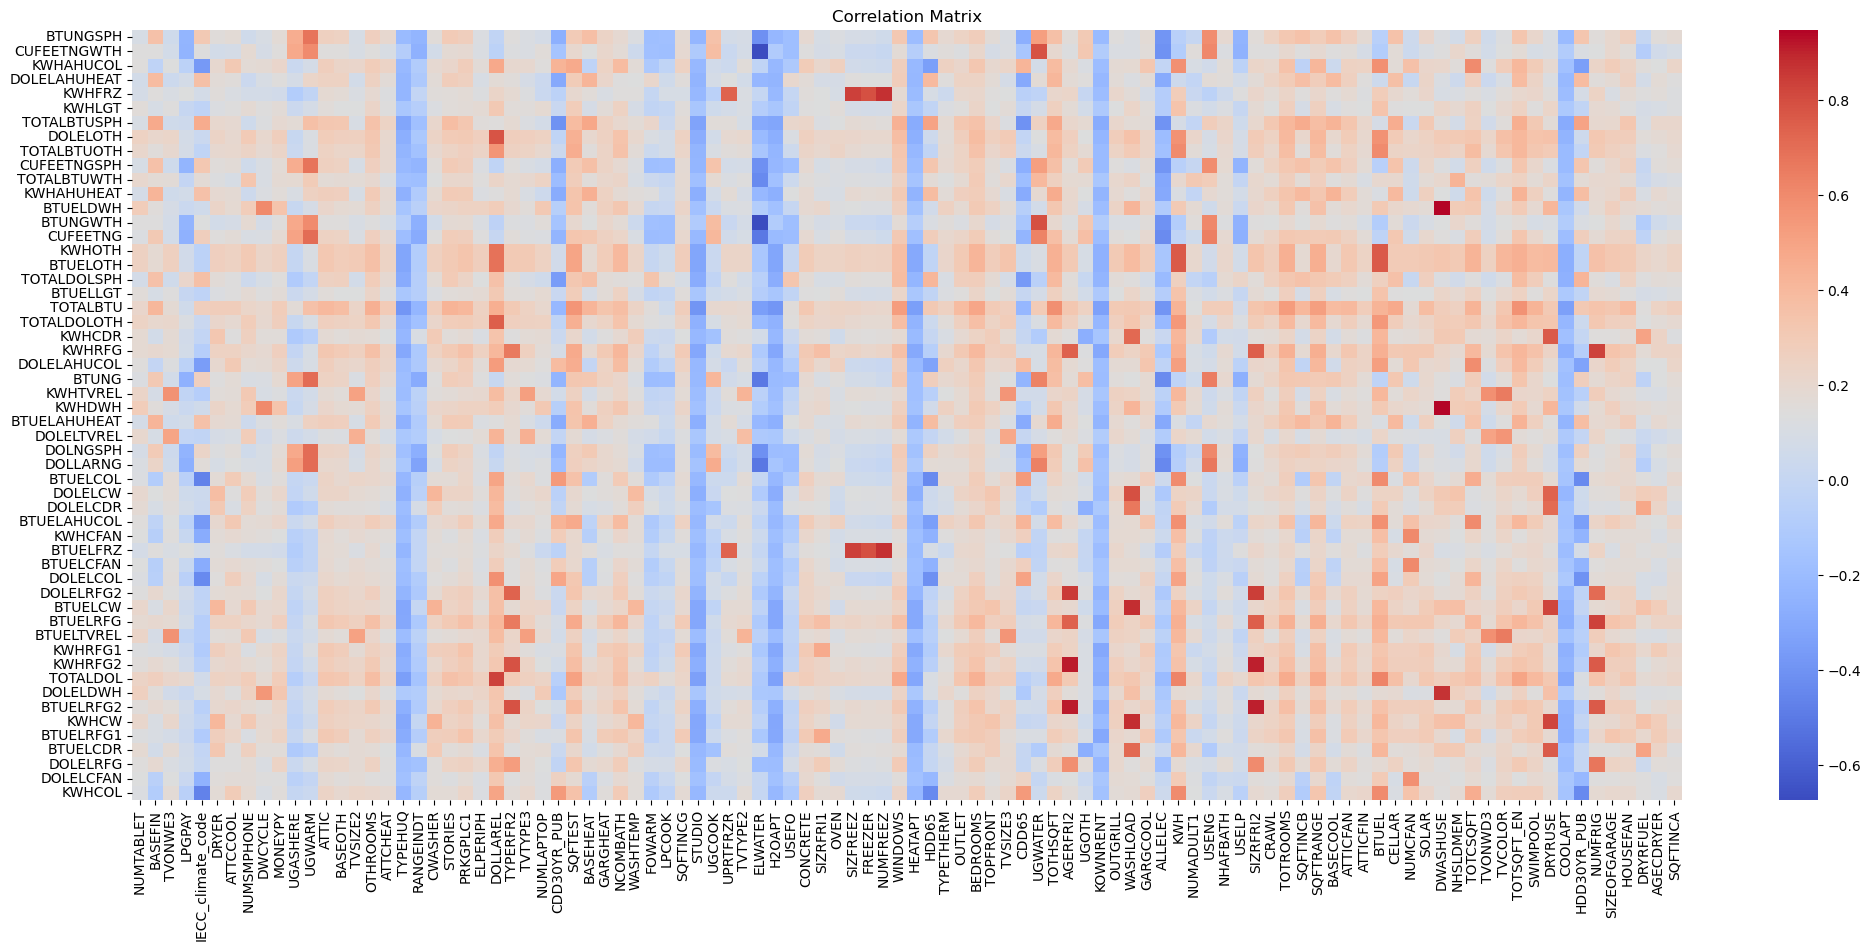

In [115]:
# Plot the heatmap
plt.figure(figsize=(25, 10))
sns.heatmap(filtered_corr_matrix, annot=False, fmt=".2f", cmap='coolwarm', cbar=True)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Correlation Matrix')
plt.show()